# Package Preparation

In [1]:
import string
import re

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import initializers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load Data

Dataset obtained from https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification

In [2]:
df = pd.read_csv('../input/ecommerce-text-classification/ecommerceDataset.csv',
                 engine='python',
                 error_bad_lines=False,
                 names=['label', 'text'])
df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,label,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [3]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50424 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   50424 non-null  object
 1   text    50424 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [4]:
labels_list = df['label'].unique()
labels_list

array(['Household', 'Books', 'Clothing & Accessories', 'Electronics'],
      dtype=object)

In [5]:
df_label = pd.get_dummies(df['label'])
df = pd.concat([df['text'], df_label], axis=1)
df.head()

,text,Books,Clothing & Accessories,Electronics,Household
0,Paper Plane Design Framed Wall Hanging Motivat...,0,0,0,1
1,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",0,0,0,1
2,SAF 'UV Textured Modern Art Print Framed' Pain...,0,0,0,1
3,"SAF Flower Print Framed Painting (Synthetic, 1...",0,0,0,1
4,Incredible Gifts India Wooden Happy Birthday U...,0,0,0,1


In [6]:
clear_text = df['text'].values
labels = df[labels_list].values
clear_text[:2]

array(['Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for etern

In [7]:
labels[:2]

array([[1, 0, 0, 0],
       [1, 0, 0, 0]], dtype=uint8)

# Text Preprocessing

In [8]:
stop_words = stopwords.words('english')

for i, t in enumerate(clear_text):
    lower_text = t.lower()
    
    #remove punctuation
    del_punc = "".join([char for char in lower_text if char not in string.punctuation])

    # remove stopword
    del_stopword = " ".join([word for word in del_punc.split() if word not in stop_words])

    clear_text[i] = del_stopword

clear_text[:2]

array(['paper plane design framed wall hanging motivational office decor art prints 87 x 87 inch set 4 painting made synthetic frame uv textured print gives multi effects attracts towards special series paintings makes wall beautiful gives royal touch painting ready hang would proud possess unique painting niche apart use modern efficient printing technology prints inks precision epson roland hp printers innovative hd printing technique results durable spectacular looking prints highest last lifetime print solely topnotch 100 inks achieve brilliant true colours due high level uv resistance prints retain beautiful colours many years add colour style living space digitally printed painting pleasure eternal blissso bring home elegant print lushed rich colors makes nothing sheer elegance friends familyit would treasured forever whoever lucky recipient liven place intriguing paintings high definition hd graphic digital prints home office room',
       'saf floral framed painting wood 30 inc

# Split Data Train and Data Test

In [9]:
text_train, text_test, y_train, y_test = train_test_split(clear_text,
                                                          labels,
                                                          test_size=0.2,
                                                          random_state=45)

# Tokenizer

In [10]:
NUM_WORDS = 15000

tokenizer = Tokenizer(num_words=NUM_WORDS, oov_token='<oov>')

tokenizer.fit_on_texts(text_train)

seq_train = tokenizer.texts_to_sequences(text_train)
seq_test = tokenizer.texts_to_sequences(text_test)

x_train = pad_sequences(seq_train, padding='post',
                        maxlen=1000, truncating='post')
x_test = pad_sequences(seq_test, padding='post', 
                       maxlen=1000, truncating='post')

print(len(tokenizer.word_index))
print(x_train.max())
print(len(x_test[0]))

113694
14999
1000


{'Household': 15393, 'Books': 9515, 'Clothing & Accessories': 6978, 'Electronics': 8453}
{'Household': 3920, 'Books': 2305, 'Clothing & Accessories': 1692, 'Electronics': 2168}


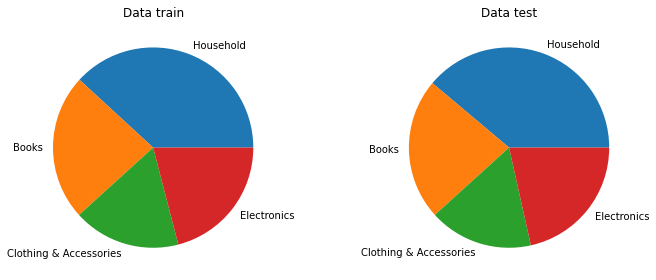

In [11]:
labels_counts_train = {}
labels_counts_test = {}

for i in range(len(labels_list)):
    value_train = pd.DataFrame(y_train)[i].value_counts().iloc[1]
    key_train = labels_list[i]
    labels_counts_train[key_train] = value_train

    value_test = pd.DataFrame(y_test)[i].value_counts().iloc[1]
    key_test = labels_list[i]
    labels_counts_test[key_test] = value_test

fig, ax = plt.subplots(1, 2, figsize = (10,4))

ax[0].pie(labels_counts_train.values(),
          labels=labels_counts_train.keys())
ax[0].set_title('Data train')

ax[1].pie(labels_counts_test.values(),
          labels=labels_counts_test.keys())
ax[1].set_title('Data test')

fig.tight_layout()
plt.show

print(labels_counts_train)
print(labels_counts_test)

# Build The Model

In [12]:
highest_acc_train = [0,0]
highest_acc_test = [0,0]

class myCallback(keras.callbacks.Callback):
    
    def on_epoch_end(self, epoch, logs={}):
        global highest_acc_train, highest_acc_test

        target_acc = 0.95

        if logs.get('acc') > target_acc and logs.get('val_acc') > target_acc:
            print("\nThe accuracy has reached >", target_acc)
            self.model.stop_training = True
        if logs.get('acc') > highest_acc_train[0]:
            highest_acc_train[0] = logs.get('acc')
            highest_acc_train[1] = epoch+1
        if logs.get('val_acc') > highest_acc_test[0]:
            highest_acc_test[0] = logs.get('val_acc')
            highest_acc_test[1] = epoch+1
            
early_stopping = keras.callbacks.EarlyStopping(patience=3, 
                                               monitor='val_acc',
                                               min_delta=0.01,
                                               verbose=1)

callbacks = myCallback()


model = models.Sequential([
    layers.Embedding(input_dim=NUM_WORDS, output_dim=32),
    layers.Bidirectional(layers.LSTM(16, dropout=0.5)),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(labels_list), activation='softmax')
])

model.summary()

model.compile(loss=losses.CategoricalCrossentropy(),
              optimizer=optimizers.Adam(learning_rate=0.001),
              metrics=['acc'])

hist = model.fit(x_train, y_train,
                 epochs=5,
                 batch_size=512,
                 validation_data=(x_test, y_test),
                 validation_steps=5,
                 verbose=2,
                 callbacks=[callbacks])

print("\nHighest training accuracy: %.4f | epoch: %i"%(highest_acc_train[0], 
                                                       highest_acc_train[1]))
print("Highest validation accuracy: %.4f | epoch: %i"%(highest_acc_test[0],
                                                       highest_acc_test[1]))

2022-10-18 00:23:39.234026: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-18 00:23:39.344373: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-18 00:23:39.345676: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-18 00:23:39.347676: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          480000    
_________________________________________________________________
bidirectional (Bidirectional (None, 32)                6272      
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 132       
Total params: 487,460
Trainable params: 487,460
Non-trainable params: 0
_________________________________________________________________


2022-10-18 00:23:42.559689: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2022-10-18 00:23:46.046641: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


79/79 - 15s - loss: 1.1563 - acc: 0.4739 - val_loss: 0.7111 - val_acc: 0.7035
Epoch 2/5
79/79 - 10s - loss: 0.4715 - acc: 0.8662 - val_loss: 0.2068 - val_acc: 0.9520
Epoch 3/5
79/79 - 10s - loss: 0.2398 - acc: 0.9467 - val_loss: 0.1602 - val_acc: 0.9625
Epoch 4/5
79/79 - 10s - loss: 0.1716 - acc: 0.9623 - val_loss: 0.1329 - val_acc: 0.9688

The accuracy has reached > 0.95

Highest training accuracy: 0.9623 | epoch: 4
Highest validation accuracy: 0.9688 | epoch: 4


# Plot the Result

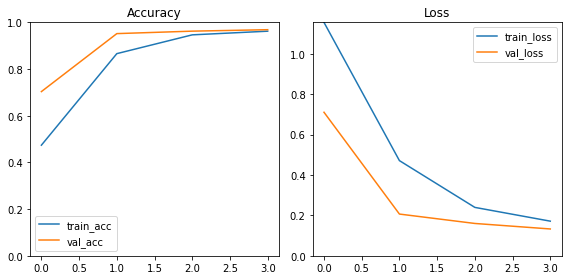

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (8,4))

ax[0].plot(hist.history['acc'], label = 'train_acc')
ax[0].plot(hist.history['val_acc'], label = 'val_acc')
ax[0].set_title('Accuracy')
ax[0].legend()
ax[0].set_ylim(0, 1)

ax[1].plot(hist.history['loss'], label = 'train_loss')
ax[1].plot(hist.history['val_loss'], label = 'val_loss')
ax[1].legend()
ax[1].set_title('Loss')
ax[1].set_ylim([0,max(hist.history['loss'] + hist.history['val_loss'])])

fig.tight_layout()
plt.show()